<a href="https://colab.research.google.com/github/gumindra/analisis-korelasi/blob/main/analisiskorelasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import scipy
from scipy.stats import pearsonr
import pandas as pd
from seaborn import regplot
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import kstest, shapiro
from scipy import stats

In [ ]:
df = pd.read_csv('mcdonaldata.csv')
df

,Unnamed: 0,item,servesize,calories,protien,totalfat,satfat,transfat,cholestrol,carbs,sugar,addedsugar,sodium,menu
0,0,McVeggie Burger,168,402,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13,regular
1,1,McAloo Tikki Burger,146,339,8.50,11.31,4.27,0.20,1.47,5.27,7.05,4.07,545.34,regular
2,2,McSpicy Paneer Burger,199,652,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58,regular
3,3,Spicy Paneer Wrap,250,674,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46,regular
4,4,American Veg Burger,177,512,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24,regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,136,Tomato Ketchup Sachets,8,11.23,0.08,23.45,0.38,0.25,0.08,2.63,2.33,1.64,414.71,condiments
137,137,Maple Syrup,3,86.4,0.00,0.00,0.00,0.40,0.30,21.60,16.20,5.34,71.05,condiments
138,138,Cheese Slice,14,51.03,3.06,3.99,0.00,0.00,13.43,0.72,0.54,0.00,15.00,condiments
139,139,Sweet Corn,40,45.08,1.47,1.00,2.89,0.01,2.00,7.55,2.54,0.00,178.95,condiments


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  141 non-null    int64  
 1   item        141 non-null    object 
 2   servesize   141 non-null    object 
 3   calories    141 non-null    object 
 4   protien     141 non-null    float64
 5   totalfat    141 non-null    float64
 6   satfat      141 non-null    float64
 7   transfat    141 non-null    float64
 8   cholestrol  141 non-null    float64
 9   carbs       141 non-null    float64
 10  sugar       141 non-null    float64
 11  addedsugar  141 non-null    float64
 12  sodium      141 non-null    float64
 13  menu        141 non-null    object 
dtypes: float64(9), int64(1), object(4)
memory usage: 15.5+ KB


In [ ]:
df.isna().sum()

Unnamed: 0    0
item          0
servesize     0
calories      0
protien       0
totalfat      0
satfat        0
transfat      0
cholestrol    0
carbs         0
sugar         0
addedsugar    0
sodium        0
menu          0
dtype: int64

In [ ]:
# Langkah 1
rata2 = df['sugar'].mean()
# Langkah 2
df['sugar'] = df['sugar'].fillna(rata2)
# Langkah 3
df['sugar'].isna().sum()

0

In [ ]:
df.isna().sum()

Unnamed: 0    0
item          0
servesize     0
calories      0
protien       0
totalfat      0
satfat        0
transfat      0
cholestrol    0
carbs         0
sugar         0
addedsugar    0
sodium        0
menu          0
dtype: int64

UJI NORMALITAS

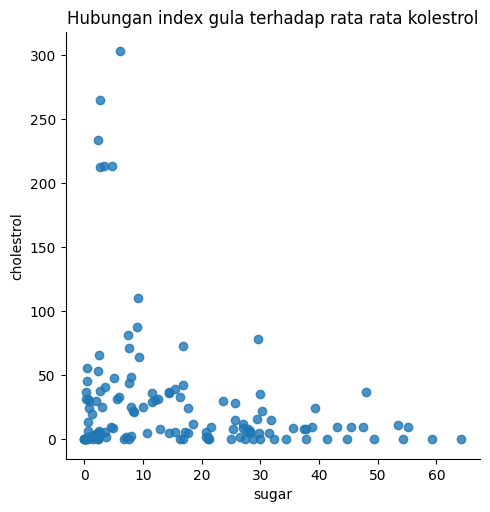

In [ ]:
#Menggunakan Plot Visualisasi
sns.lmplot(x="sugar", y="cholestrol", data=df, fit_reg=False)
plt.title("Hubungan index gula terhadap rata rata kolestrol")
plt.show()

In [ ]:
#Menggunakan Uji Shapiro-Wilk (shapiro)
swdata1 = shapiro(df['cholestrol'])
swdata2 = shapiro(df['sugar'])

print("Hasil Uji Normalitas pada kadar kolestrol rata-rata dalam darah")
print("___________________________________________________________________________________________________")
print(swdata1)
print("\n \nHasil Uji Normalitas pada  indeks gula")
print("____________________________________________________________________________________________________")
print(swdata2)

Hasil Uji Normalitas pada kadar kolestrol rata-rata dalam darah
___________________________________________________________________________________________________
ShapiroResult(statistic=0.5257987380027771, pvalue=1.8938786093011444e-19)

 
Hasil Uji Normalitas pada  indeks gula
____________________________________________________________________________________________________
ShapiroResult(statistic=0.8644776940345764, pvalue=4.897268701675728e-10)


UJI KORELASI SPEARM

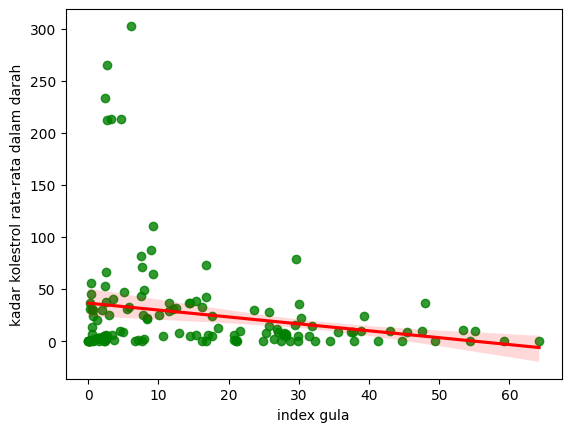

In [ ]:
#Plot visualisasi arah regresi
def plt_regression(x, y, data, label_1, label_2):
    reg_plot = regplot(x=x, y=y, fit_reg=True, data=data, line_kws={'color': 'red'}, scatter_kws= {'color': 'green'})
    plt.xlabel(label_1)
    plt.ylabel(label_2)

plt.show()
plt_regression('sugar', 'cholestrol', df,
               'index gula', 'kadar kolestrol rata-rata dalam darah')

In [ ]:
print(stats.spearmanr(df['cholestrol'], df['sugar']))

SignificanceResult(statistic=-0.0542361221011701, pvalue=0.5229817728483857)
